In [ ]:
import numpy as np
from keras import callbacks
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
import keras.optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

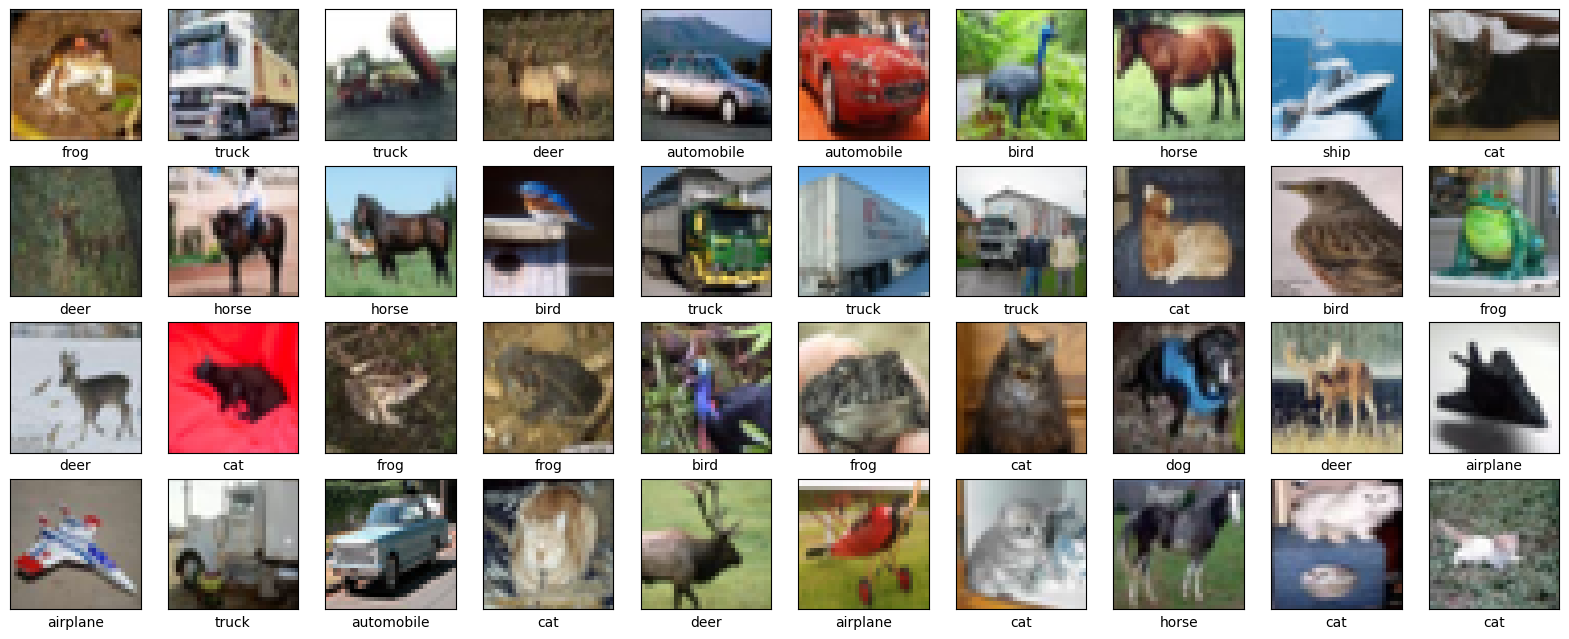

In [ ]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels.reshape(10000,)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

Applying PCA

In [ ]:
import sklearn
from sklearn.decomposition import PCA

In [ ]:
k = 200
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

In [ ]:
# Import the require libaries
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Building the XGBoost

In [ ]:
# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=780,  # Adjust as needed
    #learning_rate=0.1,  # Adjust as needed
    #max_depth=5,        # Adjust as needed
    #subsample=0.8,      # Adjust as needed
    #colsample_bytree=0.8,  # Adjust as needed
    objective='multi:softmax',
    num_class=10,
    random_state=7
)

# Train the model
xgb_model.fit(x_train_transformed, y_train.ravel())

# Make predictions on the test set
y_pred = xgb_model.predict(x_test_transformed)

# Evaluate accuracy
accuracy = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5639


In [ ]:
xgboost_predictions = xgb_model.predict_proba(x_train_transformed)
print(np.shape(xgboost_predictions))

(50000, 10)


In [ ]:
xgboost_predictions_test = xgb_model.predict_proba(x_test_transformed)
print(np.shape(xgboost_predictions_test))

(10000, 10)


Building the K-NN Neighbor Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PCA_Components = 33
pca = PCA(n_components=PCA_Components)
x_train_transformed2 = pca.fit_transform(x_train)
x_test_transformed2 = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Model building:  KNN classifier
knn = KNeighborsClassifier(n_neighbors=15).fit(x_train_transformed2, train_labels)
kNN_predictions = knn.predict_proba(x_train_transformed2)
kNN_predictions_test = knn.predict_proba(x_test_transformed2)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(kNN_predictions_test)
print(np.shape(kNN_predictions_test))

[[0.06666667 0.         0.13333333 ... 0.         0.         0.        ]
 [0.         0.13333333 0.         ... 0.         0.66666667 0.2       ]
 [0.06666667 0.13333333 0.         ... 0.         0.73333333 0.06666667]
 ...
 [0.         0.         0.13333333 ... 0.         0.         0.        ]
 [0.         0.         0.13333333 ... 0.         0.         0.        ]
 [0.06666667 0.         0.06666667 ... 0.4        0.         0.06666667]]
(10000, 10)


In [ ]:
print(kNN_predictions)
print(np.shape(kNN_predictions))


[[0.         0.         0.13333333 ... 0.         0.         0.        ]
 [0.26666667 0.26666667 0.         ... 0.         0.33333333 0.13333333]
 [0.13333333 0.06666667 0.         ... 0.06666667 0.13333333 0.6       ]
 ...
 [0.2        0.         0.         ... 0.         0.26666667 0.4       ]
 [0.         0.26666667 0.2        ... 0.         0.46666667 0.06666667]
 [0.         0.06666667 0.06666667 ... 0.33333333 0.33333333 0.        ]]
(50000, 10)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.models import load_model

Importing the probablitiy Predictions from the CNN

In [ ]:
# Specify the file path in your Drive
drive_path = '/content/drive/My Drive/cnn_reshaped_array.npy'

# Load the array from the file
CNN_predictions = np.load(drive_path)

# Verify the loaded array's shape
print("Loaded Array Shape:", CNN_predictions.shape)

Loaded Array Shape: (50000, 10)


In [ ]:
# Specify the file path in your Drive
drive_path = '/content/drive/My Drive/cnn_reshaped_array_test.npy'

# Load the array from the file
CNN_predictions_test = np.load(drive_path)

# Verify the loaded array's shape
print("Loaded Array Shape:", CNN_predictions_test.shape)

Loaded Array Shape: (10000, 10)


In [ ]:
test_labels = np.squeeze(test_labels, axis=1)
train_labels = np.squeeze(test_labels, axis=1)

In [ ]:
print(np.shape(test_labels))

(10000,)


Stack Ensemble built with the probablity predictions of each weak learner

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate predictions from base models
pred1 = kNN_predictions_test
pred2 = xgboost_predictions_test
pred3 = CNN_predictions_test



In [ ]:
print(np.shape(pred1))
print(np.shape(pred2))
print(np.shape(pred3))

(10000, 10)
(10000, 10)
(10000, 10)


In [ ]:
# Combine predictions as input features for the meta-learnerpred2,pred1,
meta_features = [pred1, pred2, pred3]


# Stack the features along axis 1 (column-wise)
meta_features = np.column_stack(meta_features)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(meta_features, test_labels, test_size=0.16, random_state=2)

# Train a meta-learner (e.g., logistic regression) on the Training Data
meta_learner = LogisticRegression()
meta_learner.fit(X_train, y_train)

final_predictions = meta_learner.predict(X_val)

# Evaluate the final predictions
accuracy = accuracy_score(y_val, final_predictions)
print(f"Final Ensemble Accuracy: {accuracy}")

Final Ensemble Accuracy: 0.814375


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
Cmat = confusion_matrix(y_val, final_predictions)
acc = accuracy_score(y_val, final_predictions)
print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.3f')) + '%')